## Observations and Insights 

### Observation 1: Every drug regimen had 25 mice except for Stelasyn.
### Observation 2: The heavier the mouse the bigger the tumor.
### Observation 3: Ramicane seems to be the best performing drug out of; Infubinol, Ceftamin, Ramicane and Capomulin.

In [1]:
# Dependencies and Setup

import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "Data/Mouse_metadata.csv"
study_results_path = "Data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged_data_df = pd.merge(mouse_metadata, study_results, how="outer", on="Mouse ID")
# Display the data table for preview
merged_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1893 entries, 0 to 1892
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1893 non-null   object 
 1   Drug Regimen        1893 non-null   object 
 2   Sex                 1893 non-null   object 
 3   Age_months          1893 non-null   int64  
 4   Weight (g)          1893 non-null   int64  
 5   Timepoint           1893 non-null   int64  
 6   Tumor Volume (mm3)  1893 non-null   float64
 7   Metastatic Sites    1893 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 133.1+ KB


In [2]:
# Checking the number of mice.
merged_data_df["Mouse ID"].count()

1893

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_data = pd.DataFrame(merged_data_df, columns=["Mouse ID", "Timepoint"])
duplicate_data_rows = duplicate_data[duplicate_data.duplicated(keep = 'last')]
print(duplicate_data_rows)

    Mouse ID  Timepoint
908     g989          0
910     g989          5
912     g989         10
914     g989         15
916     g989         20


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
dupilcateslist = merged_data_df.loc[[908,910,912,914,916],:]
dupilcateslist

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
912,g989,Propriva,Female,21,26,10,51.745156,0
914,g989,Propriva,Female,21,26,15,51.325852,1
916,g989,Propriva,Female,21,26,20,55.326122,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_list = merged_data_df.drop([908,910,912,914,916], axis=0)
cleaned_list.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
# Checking the number of mice in the clean DataFrame.
cleaned_list["Mouse ID"].count()

1888

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
#Grouby Drug Regimen
Grouped_clean_list = (cleaned_list.groupby(['Drug Regimen']))

grouped_regimen_mean = round(pd.DataFrame((cleaned_list.groupby(['Drug Regimen']).mean())),2)
grouped_regimen_mean = grouped_regimen_mean.drop(["Age_months","Weight (g)","Timepoint","Metastatic Sites"], axis=1)
grouped_regimen_mean = grouped_regimen_mean.rename(columns = {"Tumor Volume (mm3)":"Mean"})

grouped_regimen_median = round(pd.DataFrame((cleaned_list.groupby(['Drug Regimen']).median())),2)
grouped_regimen_median = grouped_regimen_median.drop(["Age_months","Weight (g)","Timepoint","Metastatic Sites"], axis=1)
grouped_regimen_median = grouped_regimen_median.rename(columns = {"Tumor Volume (mm3)":"Median"})

Summary_Statistics = pd.merge(grouped_regimen_mean, grouped_regimen_median, how="left", on="Drug Regimen")


grouped_regimen_variance = round(pd.DataFrame(cleaned_list.groupby(['Drug Regimen']).var()),2)
grouped_regimen_variance = grouped_regimen_variance.drop(["Age_months","Weight (g)","Timepoint","Metastatic Sites"], axis=1)
grouped_regimen_variance = grouped_regimen_variance.rename(columns = {"Tumor Volume (mm3)":"Variance"})
Summary_Statistics = pd.merge(Summary_Statistics, grouped_regimen_variance, how="left", on="Drug Regimen")

grouped_regimen_stddev = round(pd.DataFrame(cleaned_list.groupby(['Drug Regimen']).std()),2)
grouped_regimen_stddev = grouped_regimen_stddev.drop(["Age_months","Weight (g)","Timepoint","Metastatic Sites"], axis=1)
grouped_regimen_stddev = grouped_regimen_stddev.rename(columns = {"Tumor Volume (mm3)":"Std Dev"})
Summary_Statistics = pd.merge(Summary_Statistics, grouped_regimen_stddev, how="left", on="Drug Regimen")

grouped_regimen_sem = round(pd.DataFrame(cleaned_list.groupby(['Drug Regimen']).sem()),2)
grouped_regimen_sem = grouped_regimen_sem.drop(["Age_months","Weight (g)","Timepoint","Metastatic Sites","Mouse ID","Sex"], axis=1)
grouped_regimen_sem = grouped_regimen_sem.rename(columns = {"Tumor Volume (mm3)":"SEM"})
Summary_Statistics = pd.merge(Summary_Statistics, grouped_regimen_sem, how="left", on="Drug Regimen")
# This method is the most straighforward, creating multiple series and putting them all together at the end.
Summary_Statistics


,Mean,Median,Variance,Std Dev,SEM
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.38,50.78,43.22,6.57,0.53
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function


## Bar and Pie Charts

,Mouse Count
Drug Regimen,
Capomulin,25
Ceftamin,25
Infubinol,25
Ketapril,25
Naftisol,25
Placebo,25
Propriva,25
Ramicane,25
Stelasyn,24


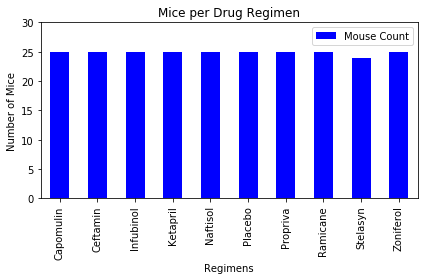

In [9]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
mouse_count = pd.DataFrame(cleaned_list.groupby(['Drug Regimen']).nunique())
mouse_count = mouse_count.drop(["Age_months","Weight (g)","Timepoint","Metastatic Sites","Tumor Volume (mm3)","Sex","Drug Regimen"], axis=1)
mouse_count = mouse_count.rename(columns = {"Mouse ID":"Mouse Count"})
mouse_count_plot = mouse_count.plot(kind="bar",facecolor="blue")
plt.title("Mice per Drug Regimen")
plt.ylim(0,30)
plt.xlabel("Regimens")
plt.ylabel("Number of Mice")
plt.tight_layout()
mouse_count_plot;
mouse_count

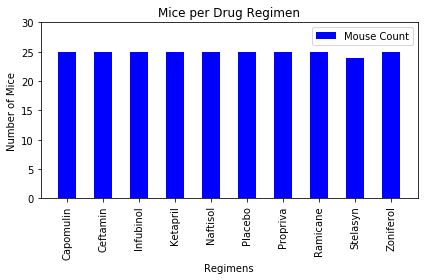

In [10]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.

count_bar = cleaned_list.groupby(['Drug Regimen'])
count_bar = count_bar.agg({'Mouse ID':"nunique"})
count_bar



plt.bar(count_bar.index.values,count_bar["Mouse ID"],color='blue', alpha=1, align="center",width =0.5, label = "Mouse Count")
plt.title("Mice per Drug Regimen")
plt.xlabel("Regimens")
plt.ylabel("Number of Mice")
plt.ylim(0,30)
plt.xticks(rotation="vertical")
plt.legend(loc="best")
plt.tight_layout()
plt.bar;
#count_bar

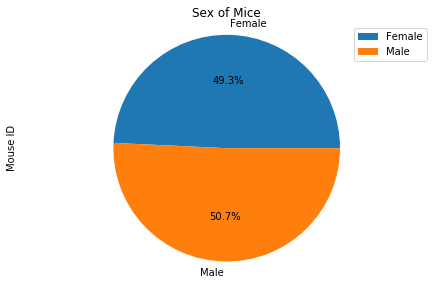

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
sex_count = pd.DataFrame(cleaned_list.groupby(['Sex']).count())
sex_count = sex_count.drop(["Age_months","Weight (g)","Timepoint","Metastatic Sites","Tumor Volume (mm3)","Drug Regimen"], axis=1)
#sex_count = pd.DataFrame(sex_count.reset_index())
sex_count
sex_count_pie = sex_count.plot.pie(y='Mouse ID',autopct='%1.1f%%')
plt.title("Sex of Mice")
plt.tight_layout()
plt.axis('equal')
sex_count_pie

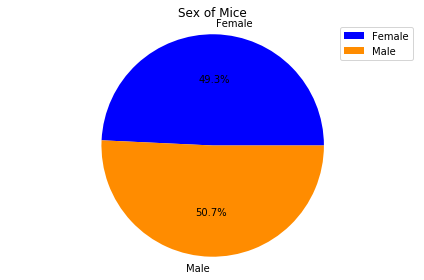

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

sex_count_py = cleaned_list.groupby(['Sex']).count()
sex_count_py

# Labels for the sections of our pie chart
labels = sex_count_py.index.values

# The values of each section of the pie chart
sizes = sex_count_py["Mouse ID"]

# The colors of each section of the pie chart
colors = ["blue", "DarkOrange"]

plt.pie(sizes, labels=labels, colors=colors,
        autopct="%1.1f%%", startangle=0);

plt.title("Sex of Mice")
plt.legend(loc="best")
plt.axis('equal')
plt.tight_layout()


## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
Tumor_total = cleaned_list.groupby("Mouse ID").max()
Tumor_total = Tumor_total.drop(["Age_months","Weight (g)","Metastatic Sites","Tumor Volume (mm3)","Sex","Drug Regimen"], axis=1)
#Tumor_total = Tumor_total.rename(columns = {"Timepoint":"Max Timepoint"})
Tumor_total
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merged_tumor_total = pd.merge(Tumor_total, cleaned_list, how="left", on=["Mouse ID","Timepoint"])
merged_tumor_total_final = merged_tumor_total.dropna()
merged_tumor_total_final["Drug Regimen"].value_counts()

Propriva     25
Infubinol    25
Placebo      25
Zoniferol    25
Ceftamin     25
Ketapril     25
Naftisol     25
Capomulin    25
Ramicane     25
Stelasyn     24
Name: Drug Regimen, dtype: int64

In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = merged_tumor_total_final["Drug Regimen"]


# Create empty list to fill with tumor vol data (for plotting)
tumorvol =[]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
tvolume = merged_tumor_total_final["Tumor Volume (mm3)"]
quartiles = tvolume.quantile([.25,.5,.75])
lowerq = round(quartiles[0.25],2)
upperq = round(quartiles[0.75],2)
iqr = round(upperq-lowerq,2)

print(f"The lower quartile is: {lowerq}")
print(f"The upper quartile is: {upperq}")
print(f"The interquartile range is: {iqr}")
print(f"The the median is: {round(quartiles[0.5],2)} ")
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
includedtreatments = merged_tumor_total_final.drop(["Timepoint","Weight (g)","Sex","Metastatic Sites","Age_months"], axis=1)
includedtreatments  = includedtreatments.set_index("Drug Regimen")
includedtreatments = includedtreatments.drop(["Ketapril","Naftisol","Placebo","Propriva","Zoniferol","Stelasyn"], axis=0)                                          

            
        
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {round(lower_bound,2)} could be outliers.")
print(f"Values above {round(upper_bound,2)} could be outliers.")    

The lower quartile is: 45.93
The upper quartile is: 64.96
The interquartile range is: 19.03
The the median is: 55.84 
Values below 17.38 could be outliers.
Values above 93.5 could be outliers.


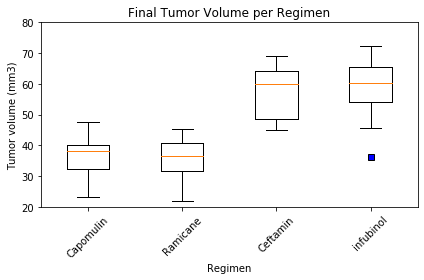

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
includedtreatments_infubinol = includedtreatments.drop(["Ceftamin","Ramicane","Capomulin"], axis=0)
tumor_volumes_infubinol = includedtreatments_infubinol["Tumor Volume (mm3)"]


includedtreatments_Ceftamin = includedtreatments.drop(["Infubinol","Ramicane","Capomulin"], axis=0)
tumor_volumes_Ceftamin = includedtreatments_Ceftamin["Tumor Volume (mm3)"]


includedtreatments_Ramicane = includedtreatments.drop(["Infubinol","Capomulin","Ceftamin"], axis=0)
tumor_volumes_Ramicane = includedtreatments_Ramicane["Tumor Volume (mm3)"]


includedtreatments_Capomulin = includedtreatments.drop(["Infubinol","Ramicane","Ceftamin"], axis=0)
tumor_volumes_Capomulin = includedtreatments_Capomulin["Tumor Volume (mm3)"]


dataplots = [tumor_volumes_Capomulin,tumor_volumes_Ramicane,tumor_volumes_Ceftamin,tumor_volumes_infubinol]
fig, axs = plt.subplots()
plt.title("Final Tumor Volume per Regimen")
plt.xlabel("Regimen")
plt.ylabel("Tumor volume (mm3)")
plt.xticks(rotation=45)
plt.ylim(20,80)
axs.boxplot(dataplots);
custom_markers = dict(markerfacecolor='b', marker='s')
axs.boxplot(dataplots, flierprops=custom_markers)
plt.xticks([1, 2, 3, 4], ['Capomulin', 'Ramicane', "Ceftamin","infubinol"])
plt.tight_layout()

## Line and Scatter Plots

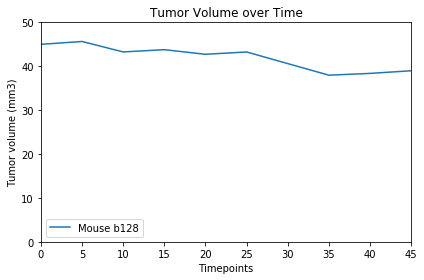

In [16]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

#Find a mouse treated with Capomulin
merged_tumor_total_final
Capomulin_mouse = merged_tumor_total_final.set_index("Drug Regimen")
Capomulin_mouse = Capomulin_mouse.loc["Capomulin", "Mouse ID"]
Capomulin_mouse

#Picked b128

Capomulin_mouse = cleaned_list.set_index("Mouse ID")
Capomulin_mouse = pd.DataFrame(Capomulin_mouse.loc["b128", ["Timepoint","Tumor Volume (mm3)"]])
Capomulin_mouse_x_axis = Capomulin_mouse["Timepoint"]
Capomulin_mouse_volumes = Capomulin_mouse["Tumor Volume (mm3)"]
plt.plot(Capomulin_mouse_x_axis, Capomulin_mouse_volumes, label="Mouse b128");
plt.title("Tumor Volume over Time")
plt.xlabel("Timepoints")
plt.ylabel("Tumor volume (mm3)")
plt.legend(loc="lower left")
plt.ylim(0,50)
plt.xlim(0,45)
plt.tight_layout()




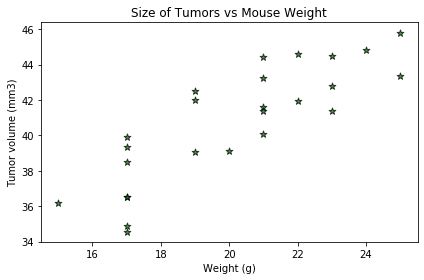

In [17]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen


#list of average tumor weights
list_of_Weights = pd.DataFrame(cleaned_list.groupby("Mouse ID").mean())
list_of_Weights= list_of_Weights.drop(["Timepoint","Metastatic Sites","Age_months", "Weight (g)"], axis=1)

#list of Capomulin Mice
Capomulin_mice = merged_tumor_total_final.set_index("Drug Regimen")
Capomulin_mice = Capomulin_mice.drop(["Timepoint","Sex","Age_months", "Tumor Volume (mm3)","Metastatic Sites"], axis=1)
Capomulin_mice = Capomulin_mice.drop(["Ketapril","Naftisol","Placebo","Propriva","Zoniferol","Stelasyn","Infubinol","Ramicane","Ceftamin"], axis=0)
Capomulin_mice = Capomulin_mice.reset_index(drop = True)

scatter_df = pd.merge(Capomulin_mice, list_of_Weights, how="left", on="Mouse ID")

data_1_scatter = round(scatter_df["Tumor Volume (mm3)"],2)
data_2_scatter = scatter_df["Weight (g)"]

plt.scatter(data_2_scatter, data_1_scatter, marker="*", facecolors="green", edgecolors="black", alpha=0.75,s=50)
plt.title("Size of Tumors vs Mouse Weight")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor volume (mm3)");
#plt.ylim(15,50)
#plt.xlim(15,30)
#scatter_df
plt.tight_layout()
#scatter_df

## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model
# for mouse weight and average tumor volume for the Capomulin regimen
scatter_df
Weightg = scatter_df.iloc[:,1]
Tvolume = scatter_df.iloc[:,2]
correlation = st.pearsonr(Weightg,Tvolume)
print(f"The correlation between both factors is {round(correlation[0],2)}")




The correlation between both factors is 0.84


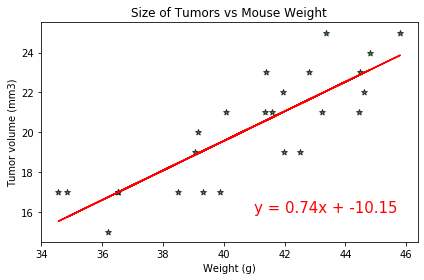

In [19]:
#list of average tumor weights
list_of_Weights = pd.DataFrame(cleaned_list.groupby("Mouse ID").mean())
list_of_Weights= list_of_Weights.drop(["Timepoint","Metastatic Sites","Age_months", "Weight (g)"], axis=1)

#list of Capomulin Mice
Capomulin_mice = merged_tumor_total_final.set_index("Drug Regimen")
Capomulin_mice = Capomulin_mice.drop(["Timepoint","Sex","Age_months", "Tumor Volume (mm3)","Metastatic Sites"], axis=1)
Capomulin_mice = Capomulin_mice.drop(["Ketapril","Naftisol","Placebo","Propriva","Zoniferol","Stelasyn","Infubinol","Ramicane","Ceftamin"], axis=0)
Capomulin_mice = Capomulin_mice.reset_index(drop = True)

scatter_df = pd.merge(Capomulin_mice, list_of_Weights, how="left", on="Mouse ID")

x_values = round(scatter_df["Tumor Volume (mm3)"],2)
y_values = scatter_df["Weight (g)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


plt.scatter(x_values, y_values, marker="*", facecolors="green", edgecolors="black", alpha=0.75)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(41,16),fontsize=15,color="red")
plt.title("Size of Tumors vs Mouse Weight")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor volume (mm3)");
#plt.ylim(15,50)
#plt.xlim(15,30)
#scatter_df
plt.tight_layout()